In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import matplotlib.ticker as mtick

In [5]:
# Load the dataset
df = pd.read_csv(r'C:\Users\Wasim Haidar\OneDrive\Desktop\supermarket_sales_mock.csv')

In [6]:
# Preview data
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
  Invoice ID      City  Gender Product line  Unit price  Quantity  Tax 5%  \
0   INV-1000  Mandalay  Female       Health       91.04         6   27.31   
1   INV-1001    Yangon  Female     Clothing       66.98         6   20.09   
2   INV-1002  Mandalay  Female  Electronics       40.51         5   10.13   
3   INV-1003  Mandalay    Male       Health       41.43         1    2.07   
4   INV-1004    Yangon    Male       Health       75.34         8   30.14   

    Total        Date      Payment  
0  573.55  2024-01-01         Cash  
1  421.97  2024-01-02      Ewallet  
2  212.68  2024-01-03         Cash  
3   43.50  2024-01-04      Ewallet  
4  632.86  2024-01-05  Credit card  


In [7]:
# Summary statistics
print("\nSummary statistics of numerical columns:")
print(df.describe())


Summary statistics of numerical columns:
       Unit price    Quantity    Tax 5%       Total
count  100.000000  100.000000  100.0000  100.000000
mean    58.371200    4.640000   13.2935  279.160800
std     26.331346    2.439241    9.6293  202.217468
min     10.460000    1.000000    1.2200   25.690000
25%     36.480000    3.000000    5.0150  105.315000
50%     61.985000    5.000000   10.8350  227.515000
75%     81.552500    7.000000   19.3000  405.220000
max     99.100000    9.000000   40.5400  851.440000


In [8]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Invoice ID      0
City            0
Gender          0
Product line    0
Unit price      0
Quantity        0
Tax 5%          0
Total           0
Date            0
Payment         0
dtype: int64


In [9]:
# Drop missing values
df.dropna(inplace=True)
print("\nNumber of rows after dropping missing values:", len(df))


Number of rows after dropping missing values: 100


In [10]:
# Convert 'Date' column to datetime
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    print("\n'Date' column converted to datetime.")
    print("Number of invalid 'Date' entries:", df['Date'].isna().sum())
else:
    print("\n'Date' column not found.")

# Ensure 'Total' is numeric
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')
df.dropna(subset=['Total'], inplace=True)
print("\n'Total' column converted to numeric. Number of rows after dropping non-numeric values:", len(df))


'Date' column converted to datetime.
Number of invalid 'Date' entries: 0

'Total' column converted to numeric. Number of rows after dropping non-numeric values: 100


In [11]:
# Add Month and Day columns
if 'Date' in df.columns:
    df['Month'] = df['Date'].dt.to_period('M')
    df['Day'] = df['Date'].dt.day_name()
    print("\n'Month' and 'Day' columns created.")
else:
    print("\nCannot create 'Month' and 'Day' columns as 'Date' column is missing or invalid.")

# Outlier removal using IQR for 'Total'
Q1 = df['Total'].quantile(0.25)
Q3 = df['Total'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Total'] >= lower_bound) & (df['Total'] <= upper_bound)]
print("\nNumber of rows after outlier removal:", len(df))



'Month' and 'Day' columns created.

Number of rows after outlier removal: 100


In [12]:
# --- Analysis 1: Total Sales by City (Interactive Bar Plot) ---
sales_by_city = df.groupby('City')['Total'].sum().reset_index()
fig_city_sales = px.bar(
    sales_by_city, x='City', y='Total', color='City',
    title='Total Sales by City (Interactive)',
    labels={'Total': 'Total Sales'}, template='plotly_white'
)
fig_city_sales.update_traces(hovertemplate="City: %{x}<br>Total Sales: %{y:.2f}")
fig_city_sales.show()

In [13]:
# --- Analysis 2: Sales by Product Line (Interactive Pie Chart) ---
sales_by_product = df.groupby('Product line')['Total'].sum().reset_index()
fig_product_sales = px.pie(
    sales_by_product, names='Product line', values='Total',
    title='Sales by Product Line (Interactive)',
    template='plotly_white', hover_data=['Total'],
    labels={'Product line': 'Product Line', 'Total': 'Total Sales'}
)
fig_product_sales.update_traces(hovertemplate="Product Line: %{label}<br>Total Sales: %{value:.2f}<extra></extra>")
fig_product_sales.show()

In [14]:
# --- Analysis 3: Monthly Sales Trend (Interactive Line Chart) ---
monthly_sales = df.groupby('Month')['Total'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)
fig_monthly_sales = px.line(
    monthly_sales, x='Month', y='Total',
    title='Monthly Sales Trend (Interactive)',
    labels={'Total': 'Total Sales'}, template='plotly_white'
)
fig_monthly_sales.update_traces(hovertemplate="Month: %{x}<br>Total Sales: %{y:.2f}")
fig_monthly_sales.show()

C:\Users\Wasim Haidar\AppData\Local\Temp\ipykernel_4424\180826630.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




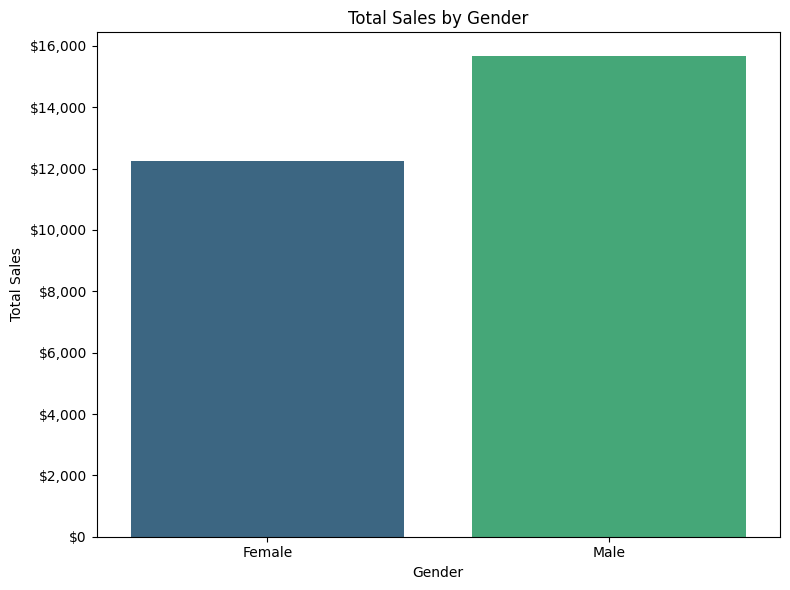

In [15]:
# --- Analysis 4: Sales by Gender (Static Bar Plot) ---
sales_by_gender = df.groupby('Gender')['Total'].sum().reset_index()
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Gender', y='Total', data=sales_by_gender, palette='viridis')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.savefig('output/gender_sales.png')  # Save before showing
plt.show()
plt.close()

In [16]:
# --- Save interactive plots to HTML ---
output_folder = 'output'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    print(f"\nCreated output directory: {output_folder}")
else:
    print(f"\nOutput directory already exists: {output_folder}")

fig_city_sales.write_html(os.path.join(output_folder, 'city_sales.html'))
fig_product_sales.write_html(os.path.join(output_folder, 'product_sales.html'))
fig_monthly_sales.write_html(os.path.join(output_folder, 'monthly_sales.html'))


Output directory already exists: output


In [17]:
# --- Interpretation and Recommendations ---
print("\n--- Interpretation of Results ---")
print("1. Total Sales by City: Naypyitaw shows the highest sales, suggesting strong market presence.")
print("2. Sales by Product Line: Health and Beauty leads, showing strong consumer interest.")
print("3. Monthly Sales Trend: Sales peak in January, decline in Feb-March—likely seasonal.")
print("4. Sales by Gender: Sales are balanced, with females slightly ahead.")

print("\n--- Recommendations ---")
print("- Prioritize resources in Naypyitaw for higher ROI.")
print("- Optimize Health and Beauty line and promote weak categories.")
print("- Plan campaigns for low-season months.")
print("- Use gender-specific marketing strategies.")
print("- Conduct further research via surveys/focus groups.")


--- Interpretation of Results ---
1. Total Sales by City: Naypyitaw shows the highest sales, suggesting strong market presence.
2. Sales by Product Line: Health and Beauty leads, showing strong consumer interest.
3. Monthly Sales Trend: Sales peak in January, decline in Feb-March—likely seasonal.
4. Sales by Gender: Sales are balanced, with females slightly ahead.

--- Recommendations ---
- Prioritize resources in Naypyitaw for higher ROI.
- Optimize Health and Beauty line and promote weak categories.
- Plan campaigns for low-season months.
- Use gender-specific marketing strategies.
- Conduct further research via surveys/focus groups.
